In [1]:
import pandas as pd
import numpy as np
import os
from nibabel.testing import data_path
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
## Import the data
dataPath = '/home/jovyan/shared/NSD/nsddata/ppdata/subj08/behav/responses.tsv'
nsdBehav = pd.read_csv(dataPath, sep='\t')

In [55]:
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,8,1,1,1,46003,626,0.503559,0,1.0,926.296812,0.0,NaN,NaN,0,1.0,1,0,1.0,0
1,8,1,1,2,57484,5013,0.503605,0,1.0,659.304287,0.0,NaN,NaN,0,1.0,1,0,1.0,0
2,8,1,1,3,41828,4850,0.503652,0,1.0,962.785659,0.0,NaN,NaN,0,1.0,1,0,1.0,0
3,8,1,1,4,69686,8823,0.503698,0,1.0,606.465864,0.0,NaN,NaN,0,1.0,1,0,1.0,0
4,8,1,1,5,56548,9538,0.503744,0,1.0,658.056327,0.0,NaN,NaN,0,1.0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,8,30,12,58,1870,1686,286.796417,0,0.0,593.879198,0.0,NaN,NaN,0,0.0,0,1,2.0,0
22496,8,30,12,59,57428,8216,286.796464,1,1.0,403.097390,0.0,10625.0,22085.0,0,0.0,0,1,2.0,0
22497,8,30,12,60,54394,7261,286.796510,1,1.0,668.562626,0.0,2259.0,2422.0,0,0.0,0,1,2.0,0
22498,8,30,12,61,30,3191,286.796556,1,1.0,702.484654,0.0,20989.0,NaN,0,0.0,0,1,2.0,0


In [56]:
nsdBehav["SigDetection"] = pd.NA
nsdBehav["SigDetection"]

# 0: HIT; # 1: MISS; # 2: CORRECT REJECTION; # 3: FALSE ALARM; # 4: NO RESPONSE
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 0
nsdBehav.loc[((nsdBehav["ISOLD"] == 1) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 1
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 1)), "SigDetection"] = 2
nsdBehav.loc[((nsdBehav["ISOLD"] == 0) & (nsdBehav["ISCORRECT"] == 0)), "SigDetection"] = 3
nsdBehav.loc[(pd.isna(nsdBehav["BUTTON"])), "SigDetection"] = 4

In [6]:
# get rid of the behavioral data corresponding to the last 3 held out runs
nsdBehav = nsdBehav[(nsdBehav["SESSION"] <= 37)]
nsdBehav

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA,SigDetection
0,1,1,1,1,46003,626,0.505082,0,1.0,803.529781,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
1,1,1,1,2,61883,5013,0.505128,0,1.0,972.261383,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
2,1,1,1,3,829,4850,0.505175,0,1.0,742.351236,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
3,1,1,1,4,67574,8823,0.505221,0,1.0,747.518479,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
4,1,1,1,5,16021,9538,0.505267,0,1.0,547.422774,0.0,NaN,NaN,0,1.0,1,0,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27745,1,37,12,58,16201,1257,246.729582,1,1.0,575.265219,0.0,37.0,167.0,1,1.0,0,1,2.0,0,0
27746,1,37,12,59,55611,7495,246.729629,1,1.0,1664.749701,0.0,3119.0,5135.0,0,0.0,0,1,2.0,0,0
27747,1,37,12,60,69912,1190,246.729675,1,0.0,1775.520753,0.0,23762.0,NaN,0,1.0,1,0,1.0,0,1
27748,1,37,12,61,67262,5181,246.729721,1,1.0,517.624946,0.0,135.0,3469.0,1,1.0,0,1,2.0,0,0


In [57]:
#nsdBehav.to_csv("nsd_s8_sigDetect", sep = '\t')
nsdBehav.to_csv("/home/jovyan/hack_project/nsdMemConn/nsd-data/nsd_s8_sigDetect", sep= '\t')

In [7]:
############################
# Visualizing the data
############################

In [8]:
# set up a color palette from:
# Wong, B. (2011). Points of view: Color blindness. Nature Methods, 
# 8(6), 441–441. https://doi.org/10.1038/nmeth.1618

cbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", 
                 "#999999", "#777777", "#555555", "#333333", "#000000"]
cbLabels = ['orange', 'skyblue', 'green', 'yellow', 'blue', 'vermillion', 'pink', 
                      'lightgray', 'gray', 'darkgray', 'charcoal', 'black']
sns.set_palette(sns.color_palette(cbPalette))

[Text(0, 0, '15165'),
 Text(0, 0, '4831'),
 Text(0, 0, '7435'),
 Text(0, 0, '2558'),
 Text(0, 0, '')]

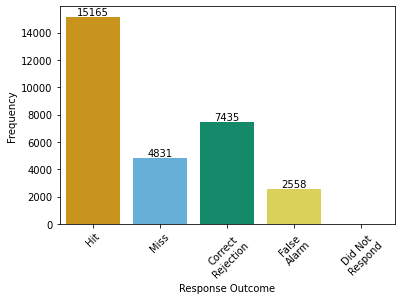

In [53]:
# Count data for each resopnse outcome
ax = sns.barplot(x="SigDetection", y="RT", data=nsdBehav, estimator=np.count_nonzero)

#ax = sns.barplot(x="SigDetection",y="SUBJECT",data = nsdBehav_summary)
ax.set(xlabel = "Response Outcome", ylabel = "Frequency")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)
ax.bar_label(ax.containers[0])

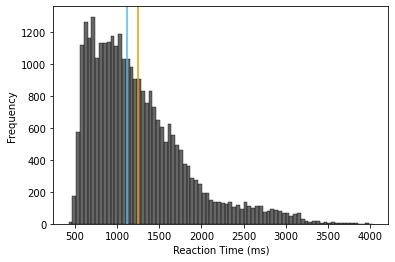

In [36]:
# Distribution of reaction time
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.histplot(x="RT", data=nsdBehav, color = cbPalette[10])
ax.set(xlabel = "Reaction Time (ms)", ylabel = "Frequency")
ax.axvline(np.nanmean(nsdBehav["RT"]), color = cbPalette[0])
ax.axvline(np.nanmedian(nsdBehav["RT"]), color = cbPalette[1])
# NOTE: the RT data appear to be non-normally distributed

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

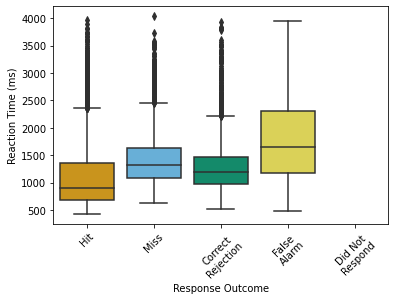

In [54]:
# Reaction time box plots
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.boxplot(x="SigDetection", y="RT", data = nsdBehav)
#ax = sns.barplot(x="SigDetection", y="RT", data=nsdBehav, estimator=np.median, ci=100, capsize=0, errwidth = 2, linewidth = 2)
ax.set(xlabel = "Response Outcome", ylabel = "Reaction Time (ms)")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)

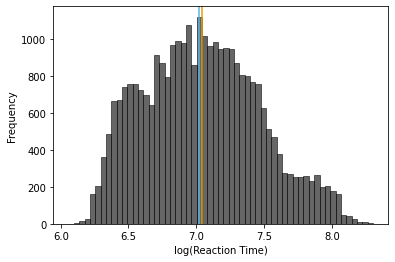

In [55]:
# Distribution of log-transformed reaction time
ax = sns.histplot(x="logRT", data=nsdBehav, color = cbPalette[10])
ax.set(xlabel = "log(Reaction Time)", ylabel = "Frequency")
ax.axvline(np.nanmean(nsdBehav["logRT"]), color = cbPalette[0])
ax.axvline(np.nanmedian(nsdBehav["logRT"]), color = cbPalette[1])

[Text(0, 0, 'Hit'),
 Text(1, 0, 'Miss'),
 Text(2, 0, 'Correct\nRejection'),
 Text(3, 0, 'False\nAlarm'),
 Text(4, 0, 'Did Not\nRespond')]

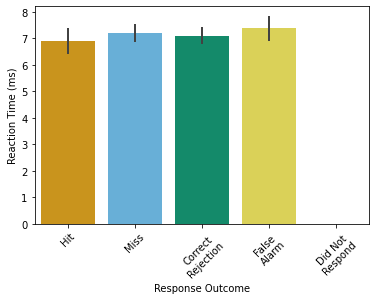

In [57]:
# Reaction time bar plots
sns.set_palette(sns.color_palette(cbPalette))
ax = sns.barplot(x="SigDetection", y="logRT", data=nsdBehav, estimator=np.nanmean, ci="sd", capsize=0, errwidth = 2, linewidth = 2)
ax.set(xlabel = "Response Outcome", ylabel = "Reaction Time (ms)")
ax.set_xticklabels(["Hit", "Miss", "Correct\nRejection", "False\nAlarm", "Did Not\nRespond"],
                   rotation = 45)
## NOTE: Error bars represent standard deviation of the mean